In [2]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
model =hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [4]:
def load_image(img_path):
  img =  tf.io.read_file(img_path)
  img = tf.io.decode_image(img, channels=3) 
  img = tf.image.convert_image_dtype(img, dtype=tf.float32)[tf.newaxis, ...]
  return img


In [17]:
content_image = load_image("/content/source.png")
style_image = load_image("/content/free-images-national-gallery-of-art-4.jpeg")

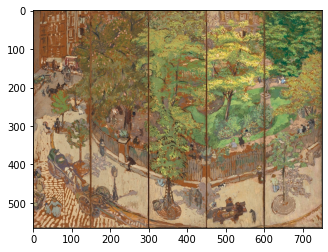

In [18]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [19]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))

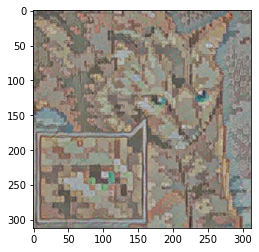

In [20]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [22]:
tf.saved_model.save(model, "/content/")

INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


In [25]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
#converter = tf.lite.TFLiteConverter.from_saved_model("/content/") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp64mhrp6p/assets


INFO:tensorflow:Assets written to: /tmp/tmp64mhrp6p/assets


AttributeError: ignored

In [26]:
style_predict_path = tf.keras.utils.get_file('style_predict.tflite', 'https://tfhub.dev/google/lite-model/magenta/arbitrary-image-stylization-v1-256/int8/prediction/1?lite-format=tflite')

2842624/2828838 [==============================] - 0s 0us/step
